In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, distinct

In [51]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")



In [52]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [53]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [54]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [55]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
recent_date = session.query(measure.date).order_by(measure.date.desc()).first()
recent_date

('2017-08-23',)

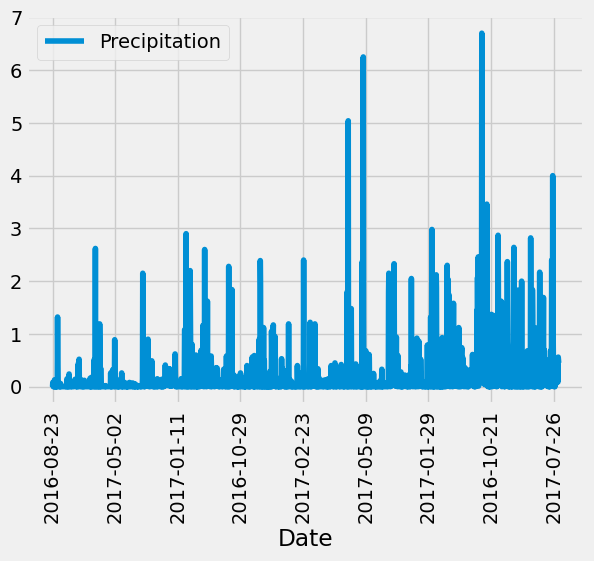

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23)-dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
results = session.query(measure.date, measure.prcp).filter(measure.date >= year_ago).all()
    

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results, columns=["Date", "Precipitation"])
results_df = results_df.dropna()
results_df
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(x="Date", y="Precipitation", kind="line")
plt.xticks(rotation="vertical")
plt.show()

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()


9

In [60]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(measure.station, func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)).\
filter(measure.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

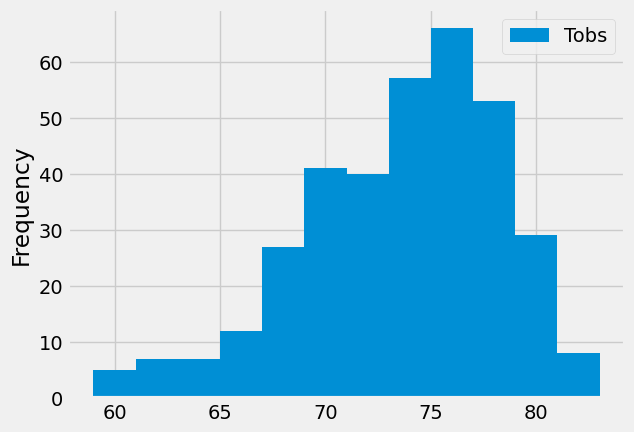

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measure.tobs).filter(measure.date >= year_ago).filter(measure.station=='USC00519281').all()
temps_df = pd.DataFrame(temps, columns=["Tobs"])
temps_df.plot.hist(bins=12)
plt.show()

# Close Session

In [63]:
# Close Session
session.close()